In [0]:
def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = numpy.zeros((img.shape))
    print('loop r: ', numpy.uint16(numpy.arange(filter_size/2.0,
                          img.shape[0]-filter_size/2.0+1)))
    #Looping through the image to apply the convolution operation.
    for r in numpy.uint16(numpy.arange(filter_size/2.0,
                          img.shape[0]-filter_size/2.0+1)):
        for c in numpy.uint16(numpy.arange(filter_size/2.0,
                                           img.shape[1]-filter_size/2.0+1)):
           # Getting the current region to get multiplied with the filter.
            # How to loop through the image and get the region based on
            # the image and filer sizes is the most tricky part of convolution.
            curr_region = img[r-numpy.uint16(numpy.floor(filter_size/2.0)):r+numpy.uint16(numpy.ceil(filter_size/2.0)),
                              c-numpy.uint16(numpy.floor(filter_size/2.0)):c+numpy.uint16(numpy.ceil(filter_size/2.0))]
            #Element-wise multiplication between the current region and the filter.
            curr_result = curr_region * conv_filter
            conv_sum = numpy.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum
            #Saving the summation in the convolution layer feature map.
            #Clipping the outliers of the result matrix.
    print('result: ', result)
    final_result = result[numpy.uint16(filter_size/2.0):result.shape[0]- numpy.uint16(filter_size/2.0),
                          numpy.uint16(filter_size/2.0):result.shape[1]- numpy.uint16(filter_size/2.0)]
    return final_result
  
def  convolution(img, conv_filter):
  '''
  如果图片的规格为[img_height, img_width],过滤器规格为[filter_height, filter_width]
  那么在水平方向上横向移动过滤器进行卷积运算的次数为img_width - filter_width +1.
  在竖直方向上竖直移动过滤器进行卷积运算次数为image_hieght - filter_height + 1
  '''
  move_steps_vertical = img.shape[0] - conv_filter.shape[0] + 1
  move_steps_horizontal = img.shape[1] - conv_filter.shape[1] + 1
  
  result = numpy.zeros((move_steps_vertical, move_steps_horizontal))
 
  for vertical_index in range(move_steps_vertical):
    for horizontal_index in range(move_steps_horizontal):
      '''
      先从最顶端开始，选取3*3小块与过滤器进行卷积运算，然后在水平方向平移一个单位。
      当水平移动抵达最右边后，返回到最左边但是往下挪到一个单位，再重复上面步骤进行
      卷积运算
      '''
      region = img[vertical_index : vertical_index + conv_filter.shape[0],
                  horizontal_index : horizontal_index + conv_filter.shape[1]]
      
      #调试时可以反注释下面两条语句以理解代码逻辑
      #print('region index: ', vertical_index, horizontal_index)
      #print('current region: ', region)
      
      current_result = region * conv_filter
      conv_sum = np.sum(current_result)
      if conv_sum < 0:
        conv_sum = 0
      result[vertical_index, horizontal_index] = conv_sum
      
  return result 
      
      

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
import numpy as np
import numpy

img = np.array([
    [10, 10, 10, 0, 0 ,0],
    [10, 10, 10, 0, 0 ,0],
    [10, 10, 10, 0, 0 ,0],
    [10, 10, 10, 0, 0 ,0],
    [10, 10, 10, 0, 0 ,0],
    [10, 10, 10, 0, 0 ,0],
])

filter = np.array(
    [
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1],
    ]
  
)

filter1 = np.array(
    [
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1],
    ]
  
)

conv_img = convolution(img, filter)
print(conv_img)

img = np.array([
    [10, 10, 10, 10, 10 ,10],
    [10, 0, 0, 0, 0 ,0],
    [10, 0, 0, 0, 0 ,0],
    [10, 10, 10, 0, 0 ,0],
    [10, 10, 10, 0, 0 ,0],
    [10, 10, 10, 0, 0 ,0],
])

conv_img = convolution(img, filter1)
print(conv_img)

[[ 0. 30. 30.  0.]
 [ 0. 30. 30.  0.]
 [ 0. 30. 30.  0.]
 [ 0. 30. 30.  0.]]
[[20. 30. 30. 30.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


(410, 618)


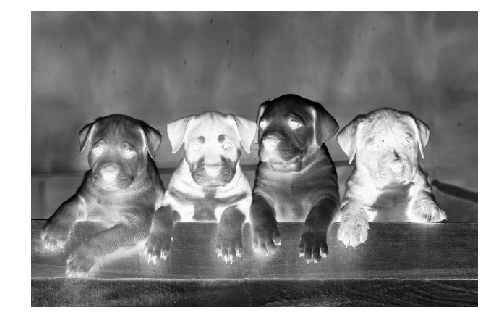

In [3]:
#加载图片，并将图片转换为像素点只包含一个数值的灰度图
import  skimage.data


image_path = '/content/gdrive/My Drive/dog.jpg'
#加载图片同时将RGB图片转换为灰度图
img = skimage.data.load(image_path, as_grey = True)



import matplotlib
from matplotlib import pyplot as plt
plt.axis('off')
plt.imshow(img)
plt.show()

In [0]:
#准备两个过滤器，每个过滤器的规格为（3，3）
filters = np.array([
    [
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ],
    [
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]
    ]
])

def  convolution(img, conv_filter):
  '''
  如果图片的规格为[img_height, img_width],过滤器规格为[filter_height, filter_width]
  那么在水平方向上横向移动进行卷积运算的次数为img_width - filter_width +1.
  在竖直方向上竖直移动进行卷积运算次数为image_hieght - filter_height + 1
  '''
  move_steps_vertical = img.shape[0] - conv_filter.shape[0] + 1
  move_steps_horizontal = img.shape[1] - conv_filter.shape[1] + 1
  
  result = numpy.zeros((move_steps_vertical, move_steps_horizontal))
 
  for vertical_index in range(move_steps_vertical):
    for horizontal_index in range(move_steps_horizontal):
      '''
      先从最顶端开始，选取3*3小块与运算参数进行卷积运算，然后在水平方向平移一个单位。
      当水平移动抵达最右边后，返回到最左边但是往下挪到一个单位，再重复上面步骤进行
      卷积运算
      '''
      region = img[vertical_index : vertical_index + conv_filter.shape[0],
                  horizontal_index : horizontal_index + conv_filter.shape[1]]
      
       
      current_result = region * conv_filter
      conv_sum = np.sum(current_result)
      
      #注意这里去掉了conv_sum < 0判断，因为在后面的激活函数实现中会处理这个问题
      
      result[vertical_index, horizontal_index] = conv_sum
      
  return result 

def  conv(img, conv_filter):
  '''
  #将过滤器依次作用到图像数组上
  '''
  #feature_map是运算参数作用到图片上后得到的结果
  feature_maps = np.zeros((img.shape[0] - conv_filter.shape[1] + 1 , 
                           img.shape[1] - conv_filter.shape[1] + 1,
                           conv_filter.shape[0]))
  for filter_num in range(conv_filter.shape[0]):
    curr_filter = conv_filter[filter_num, :]
    conv_map = convolution(img, curr_filter)
    feature_maps[:,:, filter_num] = conv_map
    
  return feature_maps


  

Text(0.5, 1.0, 'L1-Map2')

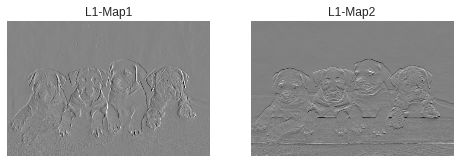

In [22]:
image_path = '/content/gdrive/My Drive/dog.jpg'
#加载图片同时将RGB图片转换为灰度图
img = skimage.data.load(image_path, as_grey = True)
#将两组运算参数作用到加载的灰度图上
l1_feature_map = conv(img, filters)

#显示第一组运算参数作用到图片上的结果，它抽取图片中物体的竖直边缘
fig1, ax1 = matplotlib.pyplot.subplots(nrows=1, ncols=2)
ax1[0].imshow(l1_feature_map[:, :, 0]).set_cmap("gray")
ax1[0].get_xaxis().set_ticks([])
ax1[0].get_yaxis().set_ticks([])
ax1[0].set_title("L1-Map1")

#显示第二组运算参数作用到图片上的结果，它抽取图片中物体的水平边缘
ax1[1].imshow(l1_feature_map[:, :, 1]).set_cmap("gray")
ax1[1].get_xaxis().set_ticks([])
ax1[1].get_yaxis().set_ticks([])
ax1[1].set_title("L1-Map2")

In [0]:
'''
模拟relu运算，它的逻辑简单，如果给定数值小于0，那就将它设置为0，如果大于0，那就保持不变
'''
def  relu(feature_map):
  relu_out = np.zeros(feature_map.shape)
  for map_num in range(feature_map.shape[-1]):
    for r in np.arange(0, feature_map.shape[0]):
      for c in np.arange(0, feature_map.shape[1]):
        relu_out[r, c, map_num] = np.max([feature_map[r, c, map_num], 0])
        
  return relu_out

Text(0.5, 1.0, 'L1-MapRelu2')

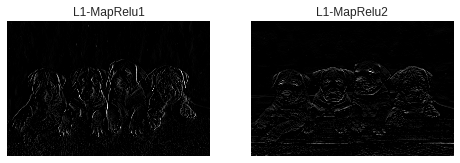

In [24]:
#显示第一幅图relu运算后的结果
fig1, ax1 = matplotlib.pyplot.subplots(nrows=1, ncols=2)
reluMap = relu(l1_feature_map)
ax1[0].imshow(reluMap[:, :, 0]).set_cmap("gray")
ax1[0].get_xaxis().set_ticks([])
ax1[0].get_yaxis().set_ticks([])
ax1[0].set_title("L1-MapRelu1")

#显示第二幅图relu运算后结果的结果
ax1[1].imshow(reluMap[:, :, 1]).set_cmap("gray")
ax1[1].get_xaxis().set_ticks([])
ax1[1].get_yaxis().set_ticks([])
ax1[1].set_title("L1-MapRelu2")

In [0]:
'''
模拟MaxPooling操作实现数据压缩
'''
def  pooling(feature_map, size = 2, stride = 2):
  #size表示将上下左右4个元素进行比较，每次操作在水平和竖直方向上移动2个单位
  pool_out_height = np.uint16((feature_map.shape[0] - size + 1) / stride + 1) 
  pool_out_width = np.uint16((feature_map.shape[1] - size + 1) / stride + 1)
  
  pool_out = np.zeros((pool_out_height, pool_out_width, feature_map.shape[-1]))
  
  #现在水平方向上平移，每次间隔2个单位，然后在竖直方向平移，每次间隔2个单位
  for map_num in range(feature_map.shape[-1]):
    r2 = 0
    for r in np.arange(0, feature_map.shape[0] - size + 1, stride):
      c2 = 0
      for c in np.arange(0, feature_map.shape[1] - size + 1, stride):
        pool_out[r2, c2, map_num] = np.max([feature_map[r : r + size,
                                                       c: c + size,
                                                       map_num]])
        c2 = c2 + 1
        
      r2 = r2 + 1
      
  return  pool_out

Text(0.5, 1.0, 'L1-pooling2')

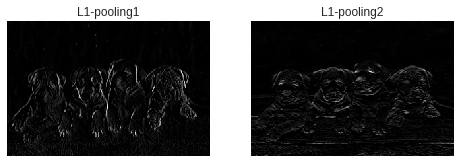

In [58]:
#显示第一幅图relu运算,再做max pooling结果
fig1, ax1 = matplotlib.pyplot.subplots(nrows=1, ncols=2)
poolingMap = pooling(reluMap)
ax1[0].imshow(poolingMap[:, :, 0]).set_cmap("gray")
ax1[0].get_xaxis().set_ticks([])
ax1[0].get_yaxis().set_ticks([])
ax1[0].set_title("L1-pooling1")

#显示第二幅图relu运算后，再做max pooling结果的结果
ax1[1].imshow(poolingMap[:, :, 1]).set_cmap("gray")
ax1[1].get_xaxis().set_ticks([])
ax1[1].get_yaxis().set_ticks([])
ax1[1].set_title("L1-pooling2")

In [60]:
filters2 = np.random.rand(2, 5, 5)
print('adding conv layer 2')
feature_map_2 = conv(poolingMap[:,:, 0], filters2)
print('ReLU')
relu_map_2 = relu(feature_map_2)
print('max pooling')
poolingMap_2 = pooling(relu_map_2)
print('End of conv layer 2')

adding conv layer 2
ReLU
max pooling
End of conv layer 2


Text(0.5, 1.0, 'Layer 2, L1-pooling2')

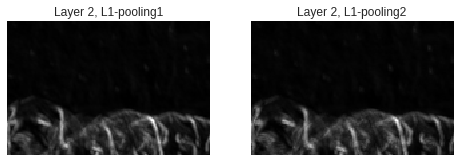

In [52]:
#显示第二层卷积层运算后第一幅图
fig1, ax1 = matplotlib.pyplot.subplots(nrows=1, ncols=2)

ax1[0].imshow(poolingMap_2[:, :, 0]).set_cmap("gray")
ax1[0].get_xaxis().set_ticks([])
ax1[0].get_yaxis().set_ticks([])
ax1[0].set_title("Layer 2, L1-pooling1")

#显示第二层卷积层运算后第二幅图
ax1[1].imshow(poolingMap_2[:, :, 1]).set_cmap("gray")
ax1[1].get_xaxis().set_ticks([])
ax1[1].get_yaxis().set_ticks([])
ax1[1].set_title("Layer 2, L1-pooling2")

In [64]:
filters3 = np.random.rand(2, 7, 7)
print('adding conv layer 3')
feature_map_3 = conv(poolingMap_2[:,:, 0], filters3)
print('ReLU')
relu_map_3 = relu(feature_map_3)
print('max pooling')
poolingMap_3 = pooling(relu_map_3)
print('End of conv layer 3')

adding conv layer 3
ReLU
max pooling
End of conv layer 3


Text(0.5, 1.0, 'Layer 2, L1-pooling2')

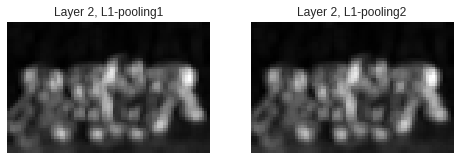

In [65]:
#显示第三层卷积层运算后第一幅图
fig1, ax1 = matplotlib.pyplot.subplots(nrows=1, ncols=2)

ax1[0].imshow(poolingMap_3[:, :, 0]).set_cmap("gray")
ax1[0].get_xaxis().set_ticks([])
ax1[0].get_yaxis().set_ticks([])
ax1[0].set_title("Layer 2, L1-pooling1")

#显示第三层卷积层运算后第二幅图
ax1[1].imshow(poolingMap_3[:, :, 1]).set_cmap("gray")
ax1[1].get_xaxis().set_ticks([])
ax1[1].get_yaxis().set_ticks([])
ax1[1].set_title("Layer 2, L1-pooling2")